<a href="https://colab.research.google.com/github/JorgeMoranBornemann/BScThesis/blob/main/Notebook_BScThesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Permafrost thaw data analysis**

The purpose of this notebook is to run through the steps, and explain, how the data analysis was performed.

It will be divided into several parts.
1. Importing data, libraries, dependencies
2. SOC - Thaw depth regressions
3. Himidity - Thaw depth regressions
4. TDD pre-processing
5. TTD - thaw depth regressions
6. Impact of SOC & Humidity on TTD regression
7. Impact of rainfall on TTD regression



In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import datetime as dt
import itertools
import seaborn as sns

In [ ]:
# importing the datasets and converting them to pandas dataframes

# URLs for the datasets
URL_soilmoisture = 'https://raw.githubusercontent.com/JorgeMoranBornemann/BScThesis/main/Datasets/all_soilmoisture.csv'
URL_ibuttons_overview = 'https://raw.githubusercontent.com/JorgeMoranBornemann/BScThesis/main/Datasets/ibuttons_overview.csv'
URL_SoilTParsed = 'https://raw.githubusercontent.com/JorgeMoranBornemann/BScThesis/main/Datasets/SoilTParsed.csv'
URL_all_thawdepth = 'https://raw.githubusercontent.com/JorgeMoranBornemann/BScThesis/main/Datasets/all_thawdepth.csv'
URL_irrigationlog = 'https://raw.githubusercontent.com/JorgeMoranBornemann/BScThesis/main/Datasets/irrigationlog.csv'
URL_plotcoordinates = 'https://raw.githubusercontent.com/JorgeMoranBornemann/BScThesis/main/Datasets/plot_coordinates.csv'
URL_BD_OM = 'https://raw.githubusercontent.com/JorgeMoranBornemann/BScThesis/main/Datasets/PreprocessedBD_OC.csv'

# loading the CSV data as pandas df
df_sm = pd.read_csv(URL_soilmoisture)
df_ib = pd.read_csv(URL_ibuttons_overview)
df_sT = pd.read_csv(URL_SoilTParsed)
df_tD = pd.read_csv(URL_all_thawdepth)
df_ir = pd.read_csv(URL_irrigationlog)
df_pl = pd.read_csv(URL_plotcoordinates)
df_OM = pd.read_csv(URL_BD_OM)

In [ ]:
df_OM

,Location,Treatment,Sample,Bulk Density [kg/m3],SOM [%],Moss Layer [cm],Additional Comments
0,5,C,5X13,926.9,40.2074,NaN,NaN
1,5,C,5X14,459.4,43.3569,NaN,NaN
2,5,C,5X15,937.8,26.8436,NaN,NaN
3,5,C,5X16,642.7,49.6908,NaN,NaN
4,5,C,5X17,586.7,62.5511,NaN,NaN
...,...,...,...,...,...,...,...
141,4,C,4C3,NaN,NaN,3.0,too gravely to sample
142,4,C,4C5,NaN,NaN,4.0,too gravely to sample
143,4,I,4I6,NaN,NaN,5.0,too gravely to sample
144,5,C,5X5,NaN,NaN,NaN,too gravely to sample


<ipython-input-23-7d89dc314d17>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(subset['Bulk Density [kg/m3]'], subset['SOM [%]'], label=f'Location {loc}', c=palette[loc - 1], marker=marker, s=25)


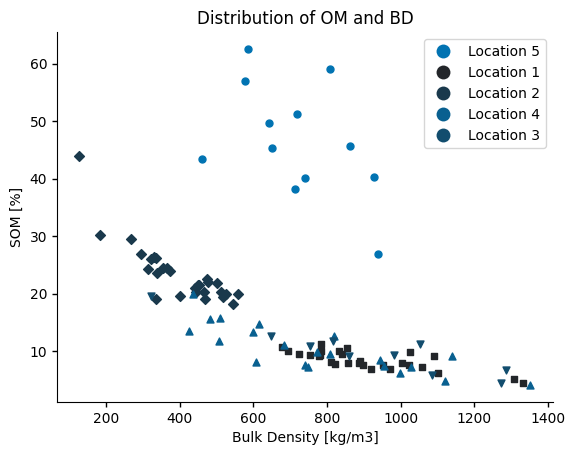

In [ ]:

# Assuming df_OM is your DataFrame
df_OM['Bulk Density [kg/m3]'] = pd.to_numeric(df_OM['Bulk Density [kg/m3]'], errors='coerce')
df_OM['SOM [%]'] = pd.to_numeric(df_OM['SOM [%]'], errors='coerce')

# Drop rows with NaN values in the specified columns
df_OM_cleaned = df_OM.dropna(subset=['Bulk Density [kg/m3]', 'SOM [%]'])

# Set a colorblind-friendly palette
palette = sns.color_palette('colorblind', n_colors=len(df_OM_cleaned['Location'].unique()))
palette = sns.dark_palette(palette[0], reverse=False, n_colors=len(df_OM_cleaned['Location'].unique()))

# Create a scatter plot with different colors and markers for each location
fig, ax = plt.subplots()
for loc, marker in zip(df_OM_cleaned['Location'].unique(), ['o', 's', 'D', '^', 'v']):
    subset = df_OM_cleaned[df_OM_cleaned['Location'] == loc]
    ax.scatter(subset['Bulk Density [kg/m3]'], subset['SOM [%]'], label=f'Location {loc}', c=palette[loc - 1], marker=marker, s=25)

# Create custom legend entries
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Location {loc}', markerfacecolor=palette[loc - 1], markersize=10, markeredgewidth=0)
                   for loc in df_OM_cleaned['Location'].unique()]

# Add labels and a custom legend
ax.set_xlabel('Bulk Density [kg/m3]')
ax.set_ylabel('SOM [%]')
ax.set_title('Distribution of OM and BD')
ax.legend(handles=legend_elements)

# Add transparent axis lines inside the graph
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Add small lines to denote the decimals on the x and y axes
ax.xaxis.set_tick_params(width=1)
ax.yaxis.set_tick_params(width=1)

# Show the plot
plt.show()

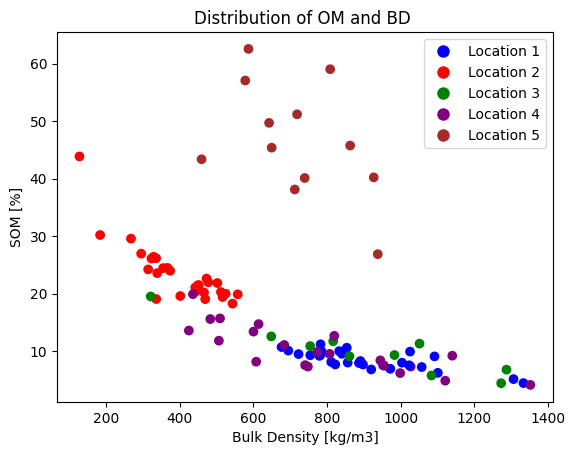

In [ ]:
# Create a scatter plot with different colors for each location

# Changing the values in the csv to numeric so matplotlib can work with it
df_OM['Bulk Density [kg/m3]'] = pd.to_numeric(df_OM['Bulk Density [kg/m3]'], errors='coerce')
df_OM['SOM [%]'] = pd.to_numeric(df_OM['SOM [%]'], errors='coerce')
# Drop rows with NaN values in the specified columns
df_OM_cleaned = df_OM.dropna(subset=['Bulk Density [kg/m3]', 'SOM [%]'])

# Set a colorblind-friendly palette
palette = sns.color_palette('colorblind', n_colors=len(df_OM_cleaned['Location'].unique()))

colors = df_OM['Location'].map({1: 'blue', 2: 'red', 3: 'green', 4: 'purple', 5:'brown'})
plt.scatter(df_OM['Bulk Density [kg/m3]'], df_OM['SOM [%]'], c=colors, )

# Create custom legend entries
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Location 1', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Location 2', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Location 3', markerfacecolor='green', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Location 4', markerfacecolor='purple', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Location 5', markerfacecolor='brown', markersize=10) ]

# Add labels and a custom legend
plt.xlabel('Bulk Density [kg/m3]')
plt.ylabel('SOM [%]')
plt.title('Distribution of OM and BD ')
plt.legend(handles=legend_elements)

# Add transparent axis lines inside the graph
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Add small lines to denote the decimals on the x and y axes
ax.xaxis.set_tick_params(width=0.5)
ax.yaxis.set_tick_params(width=0.5)

# Show the plot
plt.show()

In [ ]:
data = {'Location': [1, 1, 1, 2, 2, 2, 1, 1], 'Sample': ['1a', '1b', '1c', '2a', '2b', '2c', '1a', '1a'], 'BD': [22, 20, 24, 6, 8, 5, 21, 23], 'OM': [7, 6, 7, 30, 32, 29, 5, 6]}
df = pd.DataFrame(data)

# Filtering rows where 'Sample' is '1a'
sample_1a_df = df[df['Sample'] == '1a']

# Calculating average and variance
average_value = sample_1a_df['BD'].mean()
variance_value = sample_1a_df['OM'].var()

print(f'Average Value for 1a samples: {average_value}')
print(f'Variance of Value for 1a samples: {variance_value}')


Average Value for 1a samples: 22.0
Variance of Value for 1a samples: 1.0


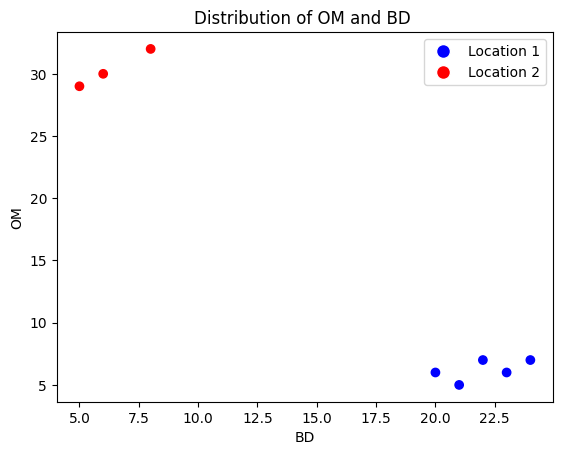

In [ ]:
# Create a scatter plot with different colors for each location
colors = df['Location'].map({1: 'blue', 2: 'red'})
plt.scatter(df['BD'], df['OM'], c=colors, )

# Create custom legend entries
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Location 1', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Location 2', markerfacecolor='red', markersize=10)]

# Add labels and a custom legend
plt.xlabel('BD')
plt.ylabel('OM')
plt.title('Distribution of OM and BD ')
plt.legend(handles=legend_elements)

# Show the plot
plt.show()

In [ ]:
print(df_sm)

     location treatment  pair plot       date  DOY  year  cumLS2022  \
0           1         C     1  1C1  7/21/2022  202  2022          0   
1           1         I     1  1I1  7/21/2022  202  2022          0   
2           1         C     2  1C2  7/21/2022  202  2022          0   
3           1         I     2  1I2  7/21/2022  202  2022          0   
4           1         C     3  1C3  7/21/2022  202  2022          0   
..        ...       ...   ...  ...        ...  ...   ...        ...   
751         5         c     2  5C2  7/28/2022  209  2022         10   
752         5         i     3  5I3  7/28/2022  209  2022         10   
753         5         c     3  5C3  7/28/2022  209  2022         10   
754         5         c     6  5C6  7/28/2022  209  2022         10   
755         5         i     6  5I6  7/28/2022  209  2022         10   

     cumES2023  cumLS2023  ...     B     C     D     E     F     G     H  \
0            0        0.0  ...    31  26.3  21.8  20.8  21.5  21.2  25.

**4. TTD-preprocessing**

In the following section, we extract the number of thawing degree days (TTD) in consecutive 10-day periods from the SoilTParsed.csv dataset. We also extract the thaw depth at the end of this 10-day period. After this, we will substract each subsequent thaw depth to get the thaw depth difference after each 10-day period, ΔTD. This data will then be stored in a separate dataset.

In [ ]:
for col in df_sT.columns:
  print(col)

Unnamed: 0
Time
Temp
Plot
Depth
Location
Day
Month
Year
Hour
Min
TimeParsed
Treatment


In [ ]:
#adds a DOY column to the dataframe
df_sT['Date-conv'] = pd.to_datetime(df_sT[['Year', 'Month', 'Day']])
df_sT['DOY'] = df_sT['Date-conv'].dt.dayofyear


df_sT.loc[['DOY']]








KeyError: ignored

In [ ]:
for col in df_sT.columns:
  print(col)

#df_sT_Day = df_sT.loc[:, ("Day", "Temp")]
#df_sT_Day.head

Unnamed: 0
Time
Temp
Plot
Depth
Location
Day
Month
Year
Hour
Min
TimeParsed
Treatment
Date-conv
DOY


In [ ]:
df_sT.head

<bound method NDFrame.head of         Unnamed: 0               Time  Temp  Plot Depth  Location  Day  Month  \
0                1  21/07/22 21:31:00   9.0   1C1    20         1   21      7   
1                2  22/07/22 01:46:00   8.0   1C1    20         1   22      7   
2                3  22/07/22 06:01:00   8.0   1C1    20         1   22      7   
3                4  22/07/22 10:16:00   7.5   1C1    20         1   22      7   
4                5  22/07/22 14:31:00   7.5   1C1    20         1   22      7   
...            ...                ...   ...   ...   ...       ...  ...    ...   
110452      110453   31/07/2023 20:46   8.0  5LS3     5         5   31      7   
110453      110454    01/08/2023 1:01   7.5  5LS3     5         5    1      8   
110454      110455    01/08/2023 5:16   7.0  5LS3     5         5    1      8   
110455      110456    01/08/2023 9:31   7.5  5LS3     5         5    1      8   
110456      110457   01/08/2023 13:46   8.0  5LS3     5         5    1      8  